# Matplotlib Challenge (Pymaceuticals Inc.)

---

- Observation 1: There were slightly more male mice used in the experiment than female mice.
- Observation 2: The tumor volume for mouse # l509 decreased over the course of its' total recorded timepoints.
- Observation 3: There is a strong positive correlation between mice weight and average tumor volume. We can infer that as the weight of the mice used in the experiment increased, the average tumor volume also tended to increase. 

In [171]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Storing File Paths in Variables
mouse_metadata_path = "c:/Users/jclaw/OneDrive/Bootcamp Files/Weekly Challenges/Challenge_05_Matplotlib/data/Mouse_metadata.csv"
study_results_path = "c:/Users/jclaw/OneDrive/Bootcamp Files/Weekly Challenges/Challenge_05_Matplotlib/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single DataFrame
merged_df = pd.DataFrame(pd.merge(mouse_metadata, study_results, on="Mouse ID", how='inner'))

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_df[merged_df[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
organized_columns_df = merged_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
duplicate_mice_df = organized_columns_df[organized_columns_df["Mouse ID"] == "g989"]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pd.DataFrame(organized_columns_df[organized_columns_df["Mouse ID"] != "g989"])
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats_df = pd.DataFrame(clean_df.groupby("Drug Regimen") ["Tumor Volume (mm3)"].mean())
summary_stats_df = summary_stats_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
summary_stats_df["Median Tumor Volume"] = clean_df.groupby("Drug Regimen") ["Tumor Volume (mm3)"].median()
summary_stats_df["Tumor Volume Variance"] = clean_df.groupby("Drug Regimen") ["Tumor Volume (mm3)"].var()
summary_stats_df["Tumor Volume Std. Dev."] = clean_df.groupby("Drug Regimen") ["Tumor Volume (mm3)"].std()
summary_stats_df["Tumor Volume Std. Err."] = clean_df.groupby("Drug Regimen") ["Tumor Volume (mm3)"].sem()
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_adv_df = pd.DataFrame(
    clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}))
summary_stats_adv_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

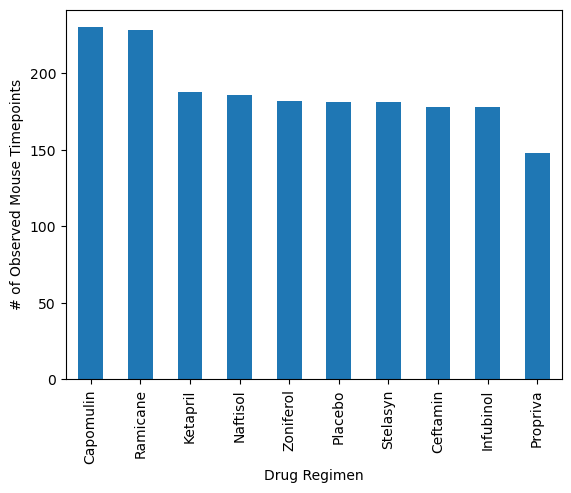

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_plot_data = pd.DataFrame(clean_df[["Drug Regimen", "Timepoint"]].groupby("Drug Regimen") ["Timepoint"].count())
bar_plot_data = bar_plot_data.sort_values("Timepoint", ascending = False)

bar_plot_Pandas = bar_plot_data.plot(kind="bar", ylabel="# of Observed Mouse Timepoints", legend=False)

plt.show()

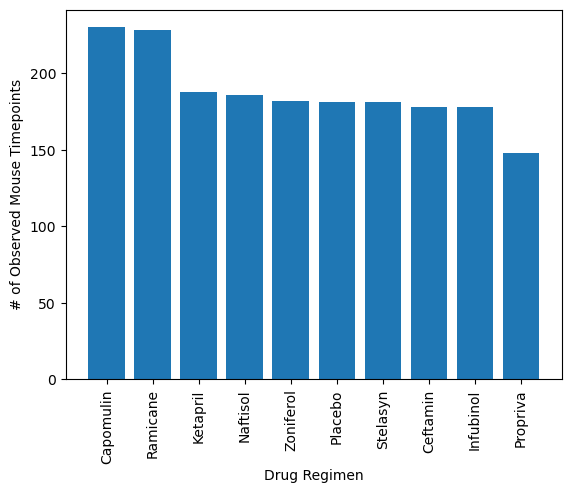

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Isolate the unique Drug Regimens into a list as these will be our x-axis
bar_plot_x = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']

# Arange a list of numbers that will be placeholders for our Drug Regimen names
x_axis = np.arange(len(clean_df["Drug Regimen"].unique()))
x_axis = [value for value in x_axis]

# Create and display the chart

bar_plot_y = bar_plot_data["Timepoint"].sort_values(ascending=False)
plt.bar(bar_plot_x, bar_plot_y)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(x_axis, bar_plot_x, rotation=90)

plt.show()

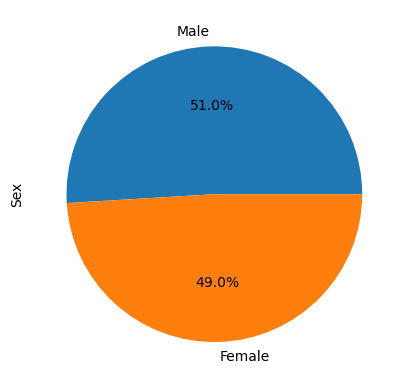

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Store the columns of data in the way we need them grouped for the plot into "pie_plot_data"
pie_plot_data = clean_df[["Mouse ID", "Sex"]].groupby("Sex") ["Mouse ID"].count()
pie_plot_data = pd.DataFrame(pie_plot_data).sort_values("Sex", ascending=False)

# Create the pie plot using the sexes as the labels and display the percentages of their distributions
pie_plot_Pandas = pie_plot_data.plot(kind="pie", y='Mouse ID', ylabel="Sex", autopct="%1.1f%%", legend=False)

plt.show()

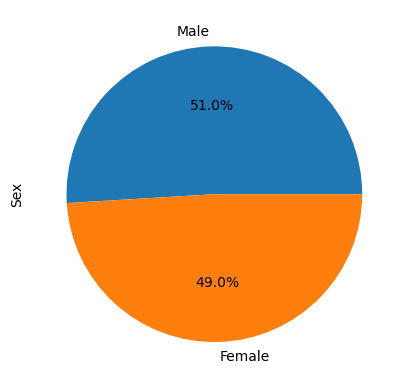

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Store the columns of data in the way we need them grouped for the plot into "pie_plot_data"
pie_plot_data = clean_df[["Mouse ID", "Sex"]].groupby("Sex") ["Mouse ID"].count()
pie_plot_data = pd.DataFrame(pie_plot_data).sort_values("Sex", ascending=False)

# Store the list of values in "Mouse ID" within the list "mice_sex_count"
mice_sex_count = [x for x in pie_plot_data["Mouse ID"]]

# Isolate the different sexes that we will use as our labels and store them into "mice_sexes_list"
mice_sexes = clean_df["Sex"].unique()
mice_sexes_list = [x for x in mice_sexes]

# Create the pie plot using the sexes as the labels and display the percentages of their distributions
plt.pie(mice_sex_count, labels=mice_sexes_list, autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [142]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time = pd.DataFrame(clean_df.groupby("Mouse ID") ["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_time_merge = pd.merge(greatest_time, clean_df, on=["Mouse ID", "Timepoint"])
greatest_time_merge = greatest_time_merge.reset_index(drop=True)
greatest_time_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [143]:
# Put treatments into a list for for loop (and later for plot labels) NOT COMPLETE!!!
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_rows = greatest_time_merge[greatest_time_merge['Drug Regimen'] == drug] ["Tumor Volume (mm3)"]

    tumor_vol_list.append(treatment_rows)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    potential_outliers = treatment_rows[ (treatment_rows >= upper_bound) | (treatment_rows <= lower_bound) ]
    print(f"{drug}'s potential outliers: {potential_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


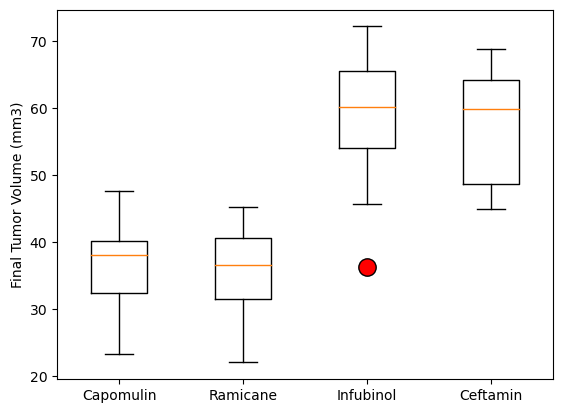

In [144]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_list, labels=treatment_list, 
            flierprops={'marker': 'o', 'markersize': 12.5, 'markerfacecolor': 'red'})

plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

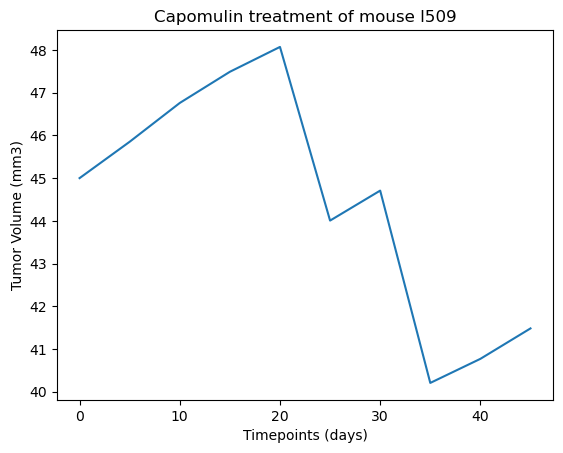

In [145]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_data = clean_df[clean_df['Mouse ID'] == 'l509'] [['Timepoint', 'Tumor Volume (mm3)']]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoints (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

plt.show()

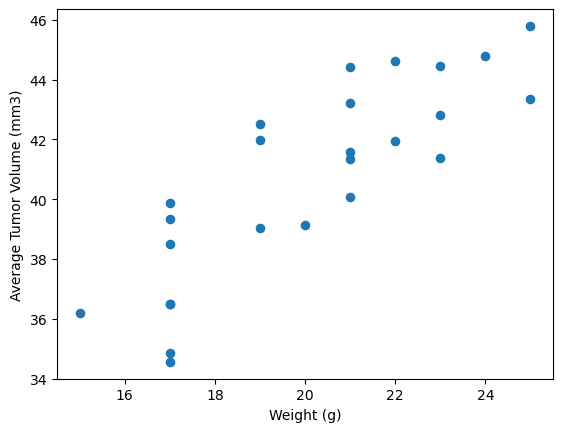

In [187]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_data = pd.DataFrame(clean_df[
    clean_df['Drug Regimen'] == 'Capomulin'].groupby(["Mouse ID"]).agg({'Tumor Volume (mm3)':'mean',"Weight (g)":'max'}))

scatter_data.plot(kind='scatter', x="Weight (g)", y='Tumor Volume (mm3)', s=35)
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


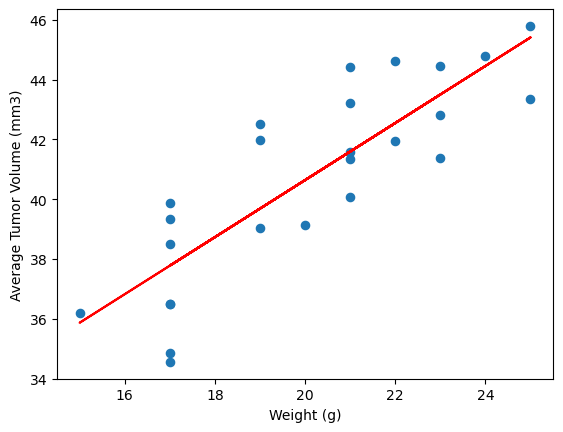

In [188]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Retreives the data for the scatter plot and create the plot. 
scatter_data = pd.DataFrame(clean_df[
    clean_df['Drug Regimen'] == 'Capomulin'].groupby(["Mouse ID"]).agg({'Tumor Volume (mm3)':'mean',"Weight (g)":'max'}))

scatter_data.plot(kind='scatter', x="Weight (g)", y='Tumor Volume (mm3)', s=35)

plt.ylabel('Average Tumor Volume (mm3)')

# Calculates the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_data["Weight (g)"], scatter_data['Tumor Volume (mm3)'])
linear_regression = scatter_data["Weight (g)"] * slope + intercept

plt.plot(scatter_data["Weight (g)"], linear_regression, color = 'red')

print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')

plt.show()